# Budgets and Sq Ft
simple regression


    # Import dependencies and set up graphics

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 400. # High res

    # Load the data

In [17]:
folder = "/Users/rvanderwall/projects/AI_Team/service-contingency-predictor/Data/Assets"
file = "Budgets.csv"
b_df = pd.read_csv(folder + "/" + file)
b_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103312 entries, 0 to 103311
Data columns (total 10 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   AccountID           103312 non-null  object 
 1   BudgetID            103312 non-null  object 
 2   PortalID            103312 non-null  object 
 3   Description         72286 non-null   object 
 4   StartDate           103312 non-null  object 
 5   State               55206 non-null   object 
 6   Country             45770 non-null   object 
 7   OriginalBudget      103312 non-null  float64
 8   CurrentCommitments  103312 non-null  float64
 9   line_item_count     103312 non-null  int64  
dtypes: float64(2), int64(1), object(7)
memory usage: 7.9+ MB


In [18]:
file = "Custom_fields.csv"
c_df = pd.read_csv(folder + "/" + file)
c_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185264 entries, 0 to 185263
Data columns (total 8 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   portal_id       185264 non-null  object 
 1   account_id      185264 non-null  object 
 2   project_type    144960 non-null  object 
 3   project_phase   46862 non-null   object 
 4   project_phases  144960 non-null  object 
 5   region          37557 non-null   object 
 6   sq_feet         50012 non-null   float64
 7   other_custom    9476 non-null    float64
dtypes: float64(2), object(6)
memory usage: 11.3+ MB


In [19]:
c_df['project_type'].unique().tolist()

[nan,
 'Freeway',
 'PedestrianBicycle',
 'Intermodal',
 'Transit',
 'CM Project >= $2 Million',
 'BID Project <= $299,999',
 'BID Project >= $300,000',
 'CM Project >= $300,000',
 'Other',
 'CM Project >= $4 Million',
 'CM Project >= $2 Million (prior to FY21 only)',
 'Design Build >= $2 Million',
 'Template',
 'Design Build >= $2 Million (prior to FY21 only)',
 'CM Project <= $299,999',
 'New Construction',
 'Renovation',
 'Information Technology',
 'Planning',
 'Maintenance & Storage Facilities',
 'Passenger Station Facilities',
 'Asset Management/State of Good Repair',
 'Rolling Stock',
 'Passenger Station FacilitiesStation Parking',
 'Passenger Station FacilitiesMaintenance & Storage FacilitiesStation Parking',
 'Passenger Station FacilitiesMaintenance & Storage FacilitiesStation ParkingTrack & Signal Infrastructure',
 'Station Parking',
 'Track & Signal Infrastructure',
 'Passenger Station FacilitiesMaintenance & Storage FacilitiesStation ParkingInformation TechnologyRolling Stock

    # define function to clean sqft data

In [20]:
def clean(x):
    if isinstance(x, float):
        return x
    x = x.replace(',','')
    try:
        x = float(x)
    except:
        x = 0.0
    return x

In [21]:
folder = "/Users/rvanderwall/projects/AI_Team/construction-AI/SQLInterface/Prototypes/SuperSimple"
file = "query_10_13.csv"
df = pd.read_csv(folder + "/" + file)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 95186 entries, 0 to 95185
Data columns (total 12 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                95186 non-null  object 
 1   BudgetID                 95186 non-null  object 
 2   PortalID                 95186 non-null  object 
 3   Description              66882 non-null  object 
 4   StartDate                95186 non-null  object 
 5   State                    50940 non-null  object 
 6   Country                  41685 non-null  object 
 7   OriginalBudget           95186 non-null  float64
 8   CurrentCommitments       95186 non-null  float64
 9   sq_feet                  20625 non-null  float64
 10  customfield_description  11196 non-null  object 
 11  customfieldname          20625 non-null  object 
dtypes: float64(3), object(9)
memory usage: 8.7+ MB


In [22]:
df['sq_feet'] = df['sq_feet'].apply(lambda x: clean(x))

In [23]:
df['State'].value_counts()

TX          5952
IN          4088
FL          3806
CA          3294
PA          2670
            ... 
Oshkosh        1
CI             1
NV.            1
PA 15213       1
Tx.            1
Name: State, Length: 354, dtype: int64

In [24]:
df['Country'].value_counts()

USA                     39701
United States            1442
US                        230
GBR                       118
CAN                       101
ISR                         7
AFG                         6
AUS                         6
ABW                         6
CHN                         5
IND                         5
NLD                         5
UAE                         5
DEU                         5
JPN                         4
SGP                         3
ISL                         3
KSA                         2
BHS                         2
LVA                         2
ASM                         2
ALB                         2
DZA                         2
CYM                         1
URY                         1
KNA                         1
AND                         1
BWA                         1
RUS                         1
FRA                         1
Harris                      1
ARG                         1
FJI                         1
YEM       

In [25]:
df['human_budget'] = df['OriginalBudget']
df['truth_budget'] = df['CurrentCommitments']

In [26]:
df[['human_budget', 'truth_budget','sq_feet']].describe()

,human_budget,truth_budget,sq_feet
count,9.518600e+04,9.518600e+04,2.062500e+04
mean,6.762986e+08,8.340516e+06,3.618662e+04
std,1.355447e+11,1.622702e+09,1.372504e+06
min,1.000000e-02,1.000000e-02,0.000000e+00
25%,2.090118e+04,1.612529e+04,0.000000e+00
50%,1.174410e+05,8.834410e+04,1.300000e+02
75%,6.884878e+05,5.003506e+05,4.135000e+03
max,3.000053e+13,5.000032e+11,1.561583e+08


<AxesSubplot:>

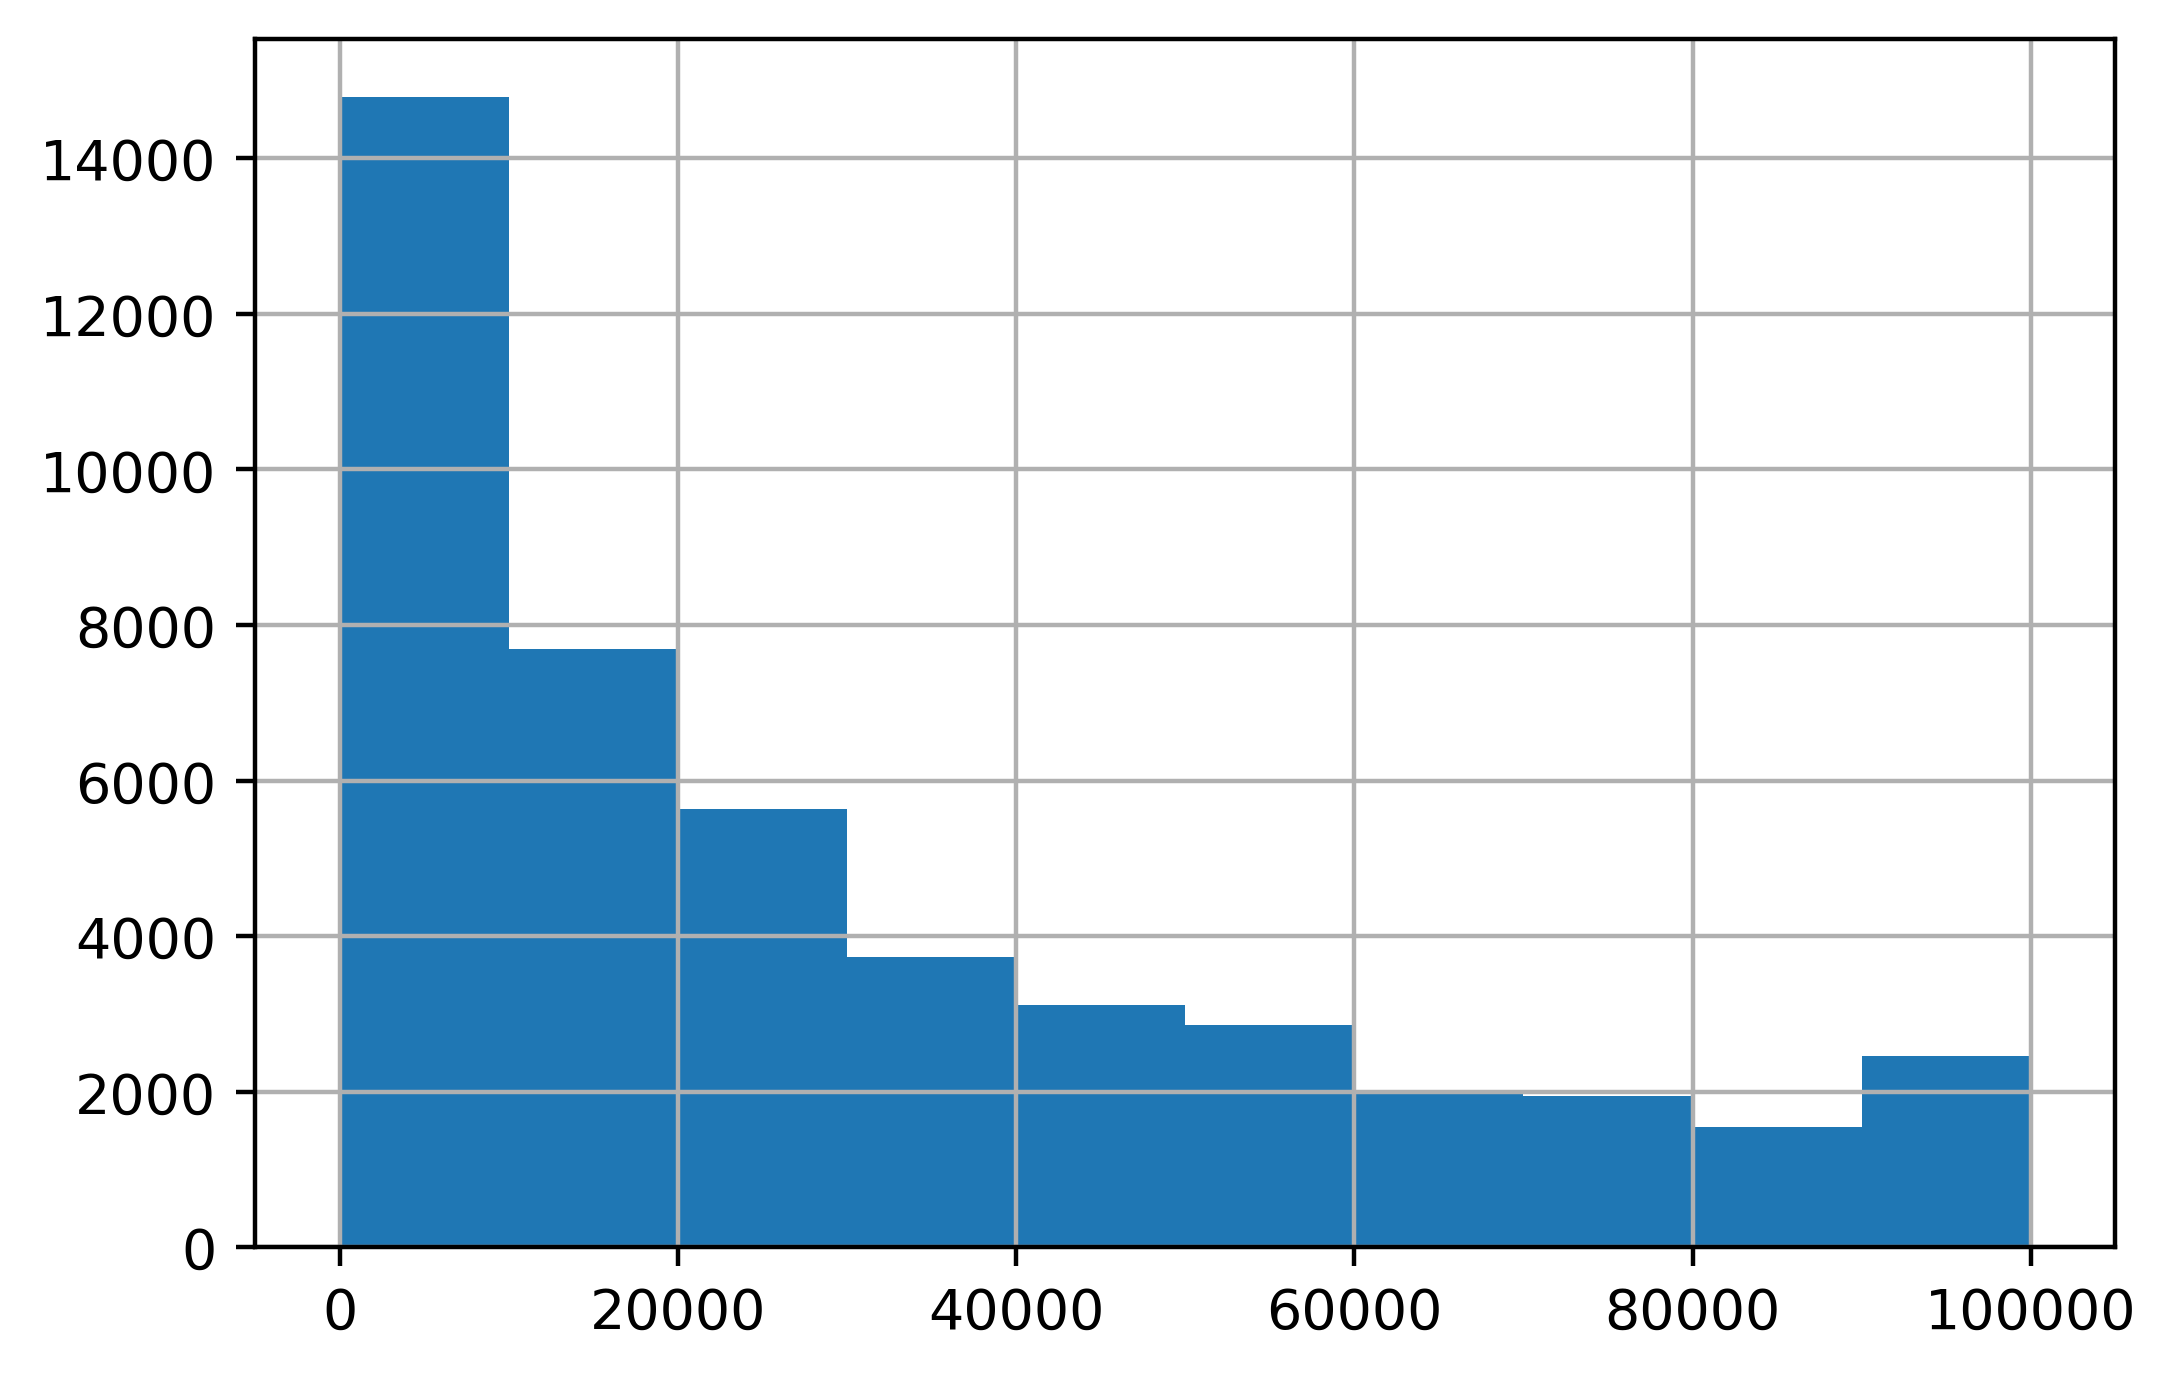

In [27]:
df['human_budget'].hist(bins=[0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000])

<AxesSubplot:>

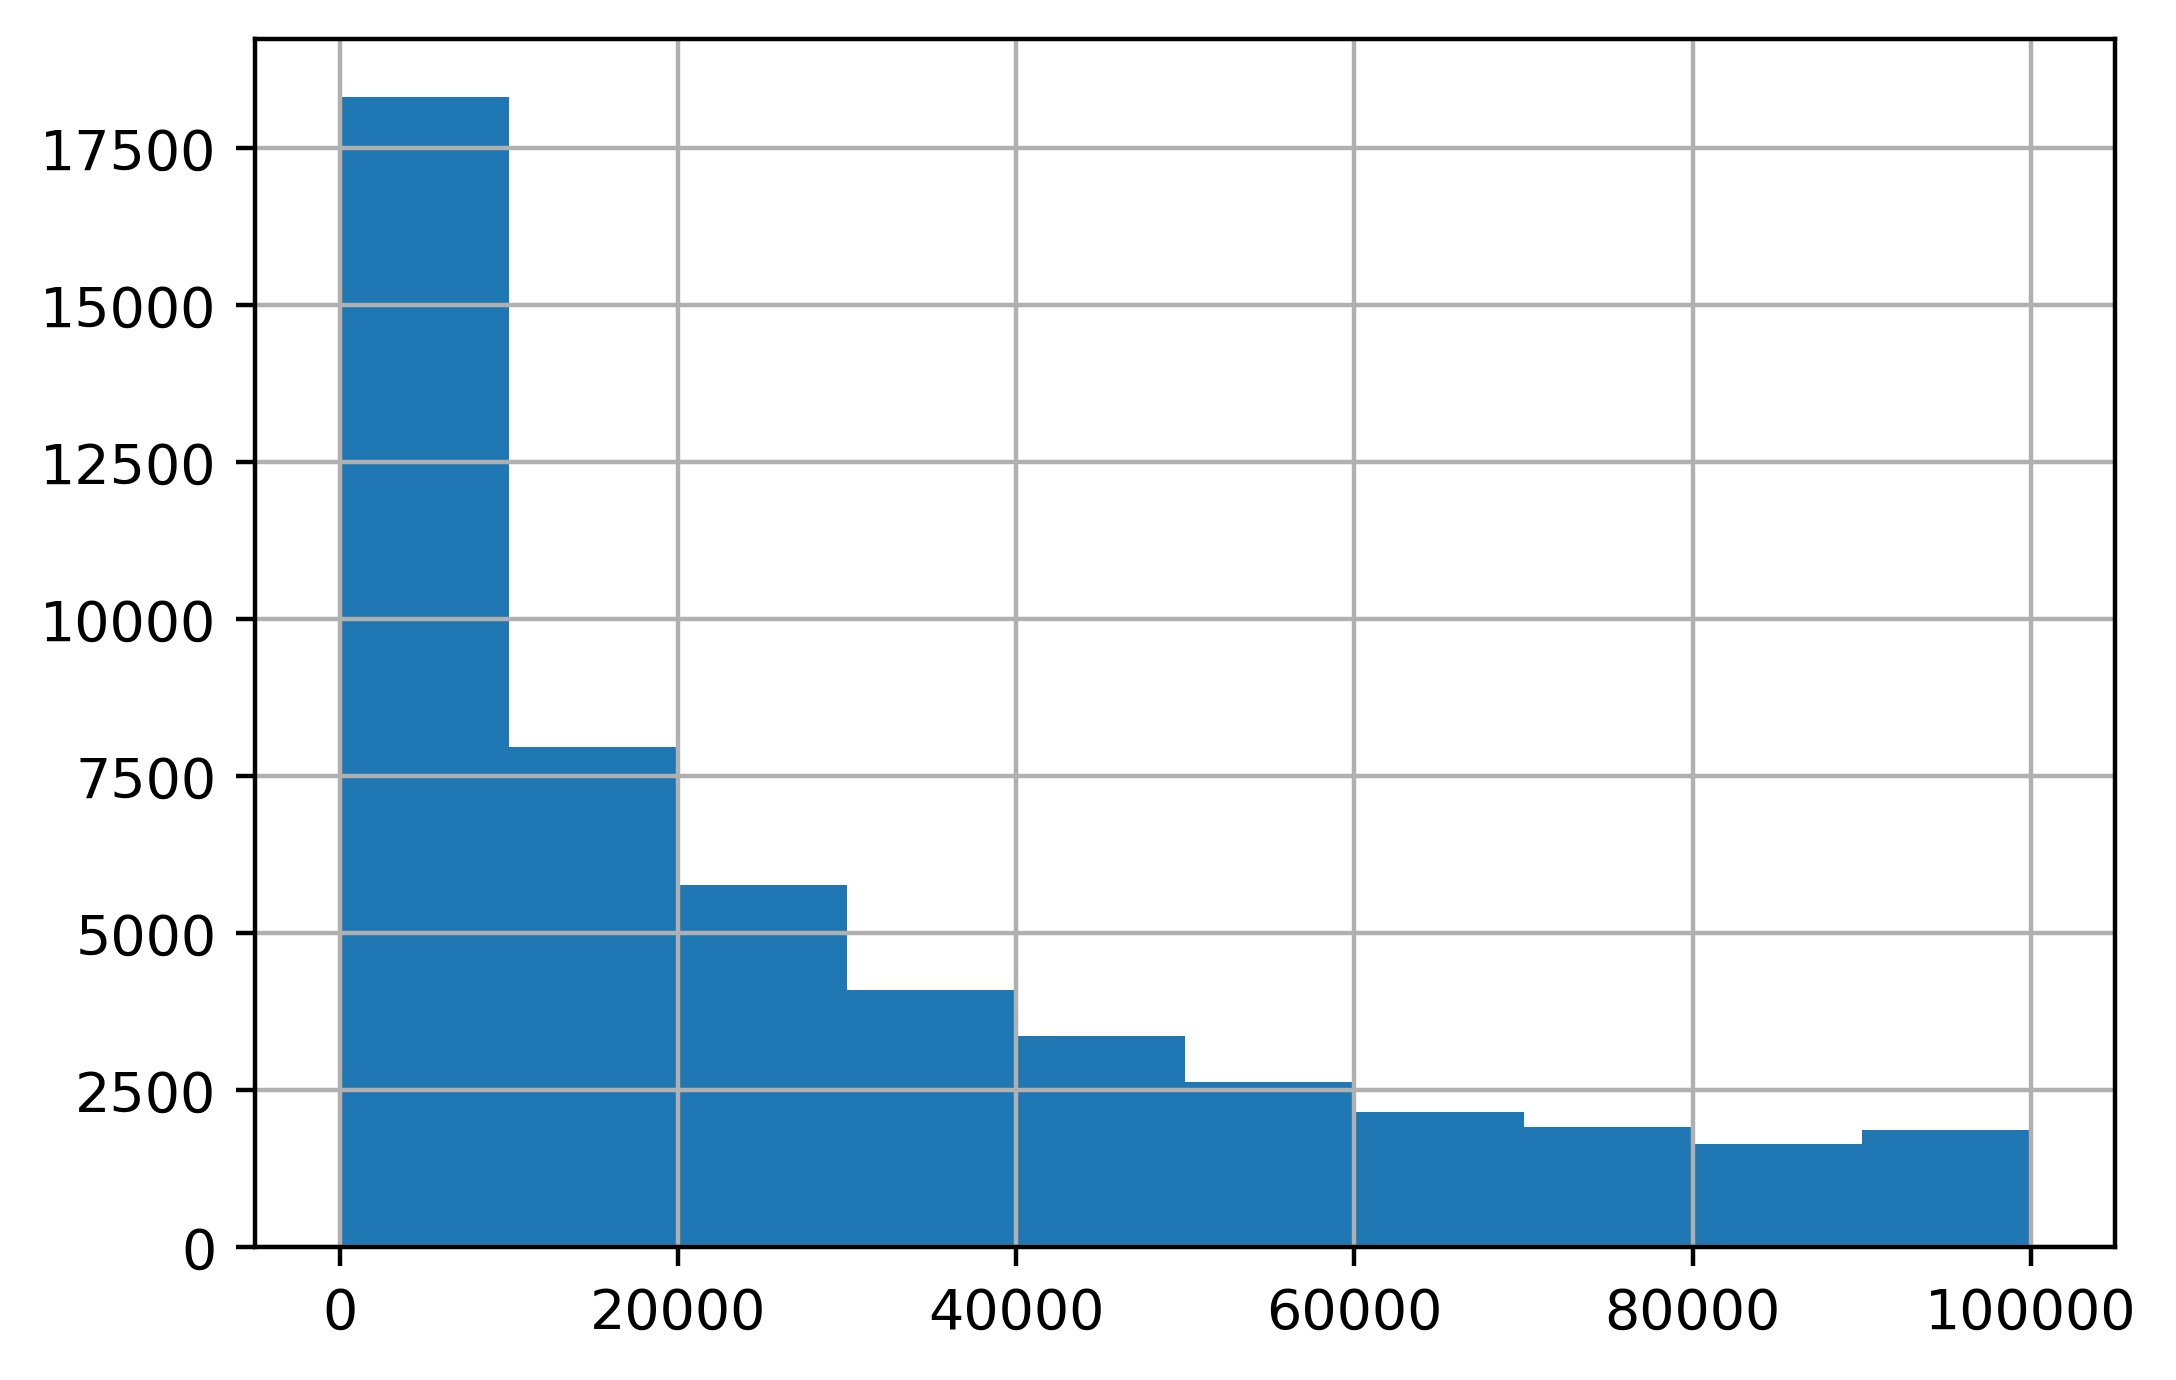

In [28]:
df['truth_budget'].hist(bins=[0, 10000, 20000, 30000, 40000, 50000, 60000, 70000, 80000, 90000, 100000])

<AxesSubplot:>

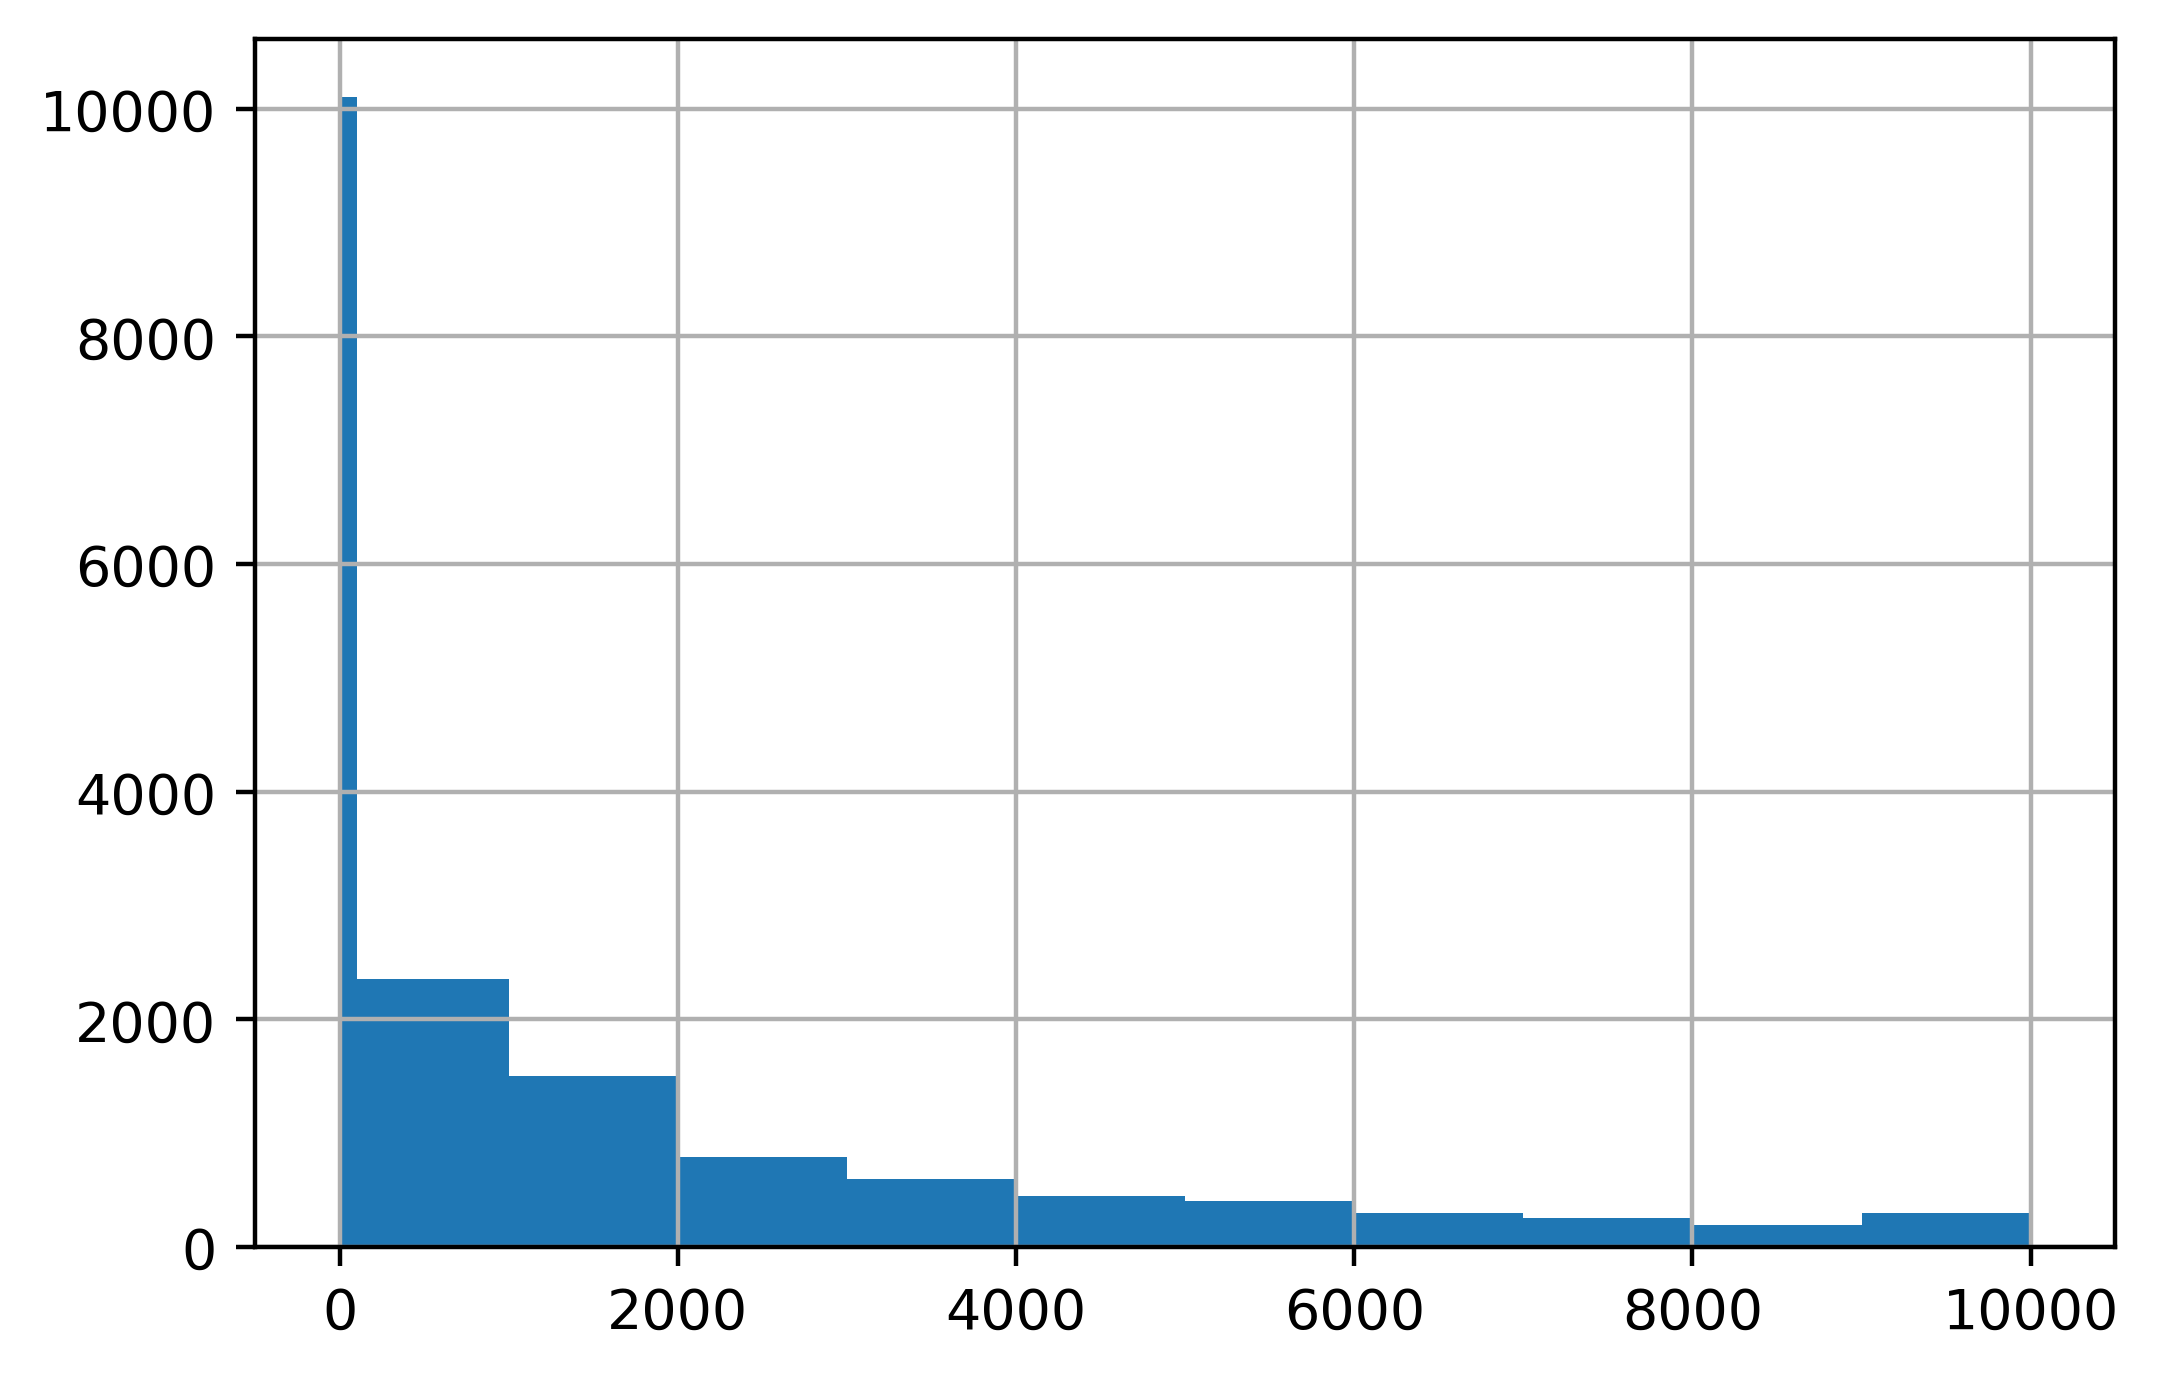

In [29]:
df['sq_feet'].hist(bins=[0, 100, 1000, 2000, 3000, 4000, 5000, 6000, 7000, 8000, 9000, 10000])

In [30]:
df.corr()

,OriginalBudget,CurrentCommitments,sq_feet,human_budget,truth_budget
OriginalBudget,1.000000,0.000010,0.000125,1.000000,0.000010
CurrentCommitments,0.000010,1.000000,0.022321,0.000010,1.000000
sq_feet,0.000125,0.022321,1.000000,0.000125,0.022321
human_budget,1.000000,0.000010,0.000125,1.000000,0.000010
truth_budget,0.000010,1.000000,0.022321,0.000010,1.000000


In [35]:
q = 'sq_feet > 0 & sq_feet < 100_000 & truth_budget < 100_000_000'
q = 'human_budget < 10_000_000 & truth_budget < 10_000_000 & sq_feet > 100 & sq_feet < 10_000'
# Lets toss outliers.  The average cost is between $70 and $1000 per sq ft
q0 = 'sq_feet <= 0'
q_l = 'sq_feet > 0 & 70 > truth_budget / sq_feet'
q_0 = 'sq_feet > 0 & 70 < truth_budget / sq_feet & truth_budget / sq_feet < 1000'
q_h = 'sq_feet > 0 & truth_budget / sq_feet > 1000'

c0 = df.query(q0).shape
c_l = df.query(q_l).shape
c_0 = df.query(q_0).shape
c_h = df.query(q_h).shape
c0, c_l, c_0, c_h

# clean_df = df.query(q)
# x = clean_df['sq_feet']
# y = clean_df['truth_budget']
# plt.scatter(x, y)

((9557, 14), (4551, 14), (5363, 14), (1154, 14))

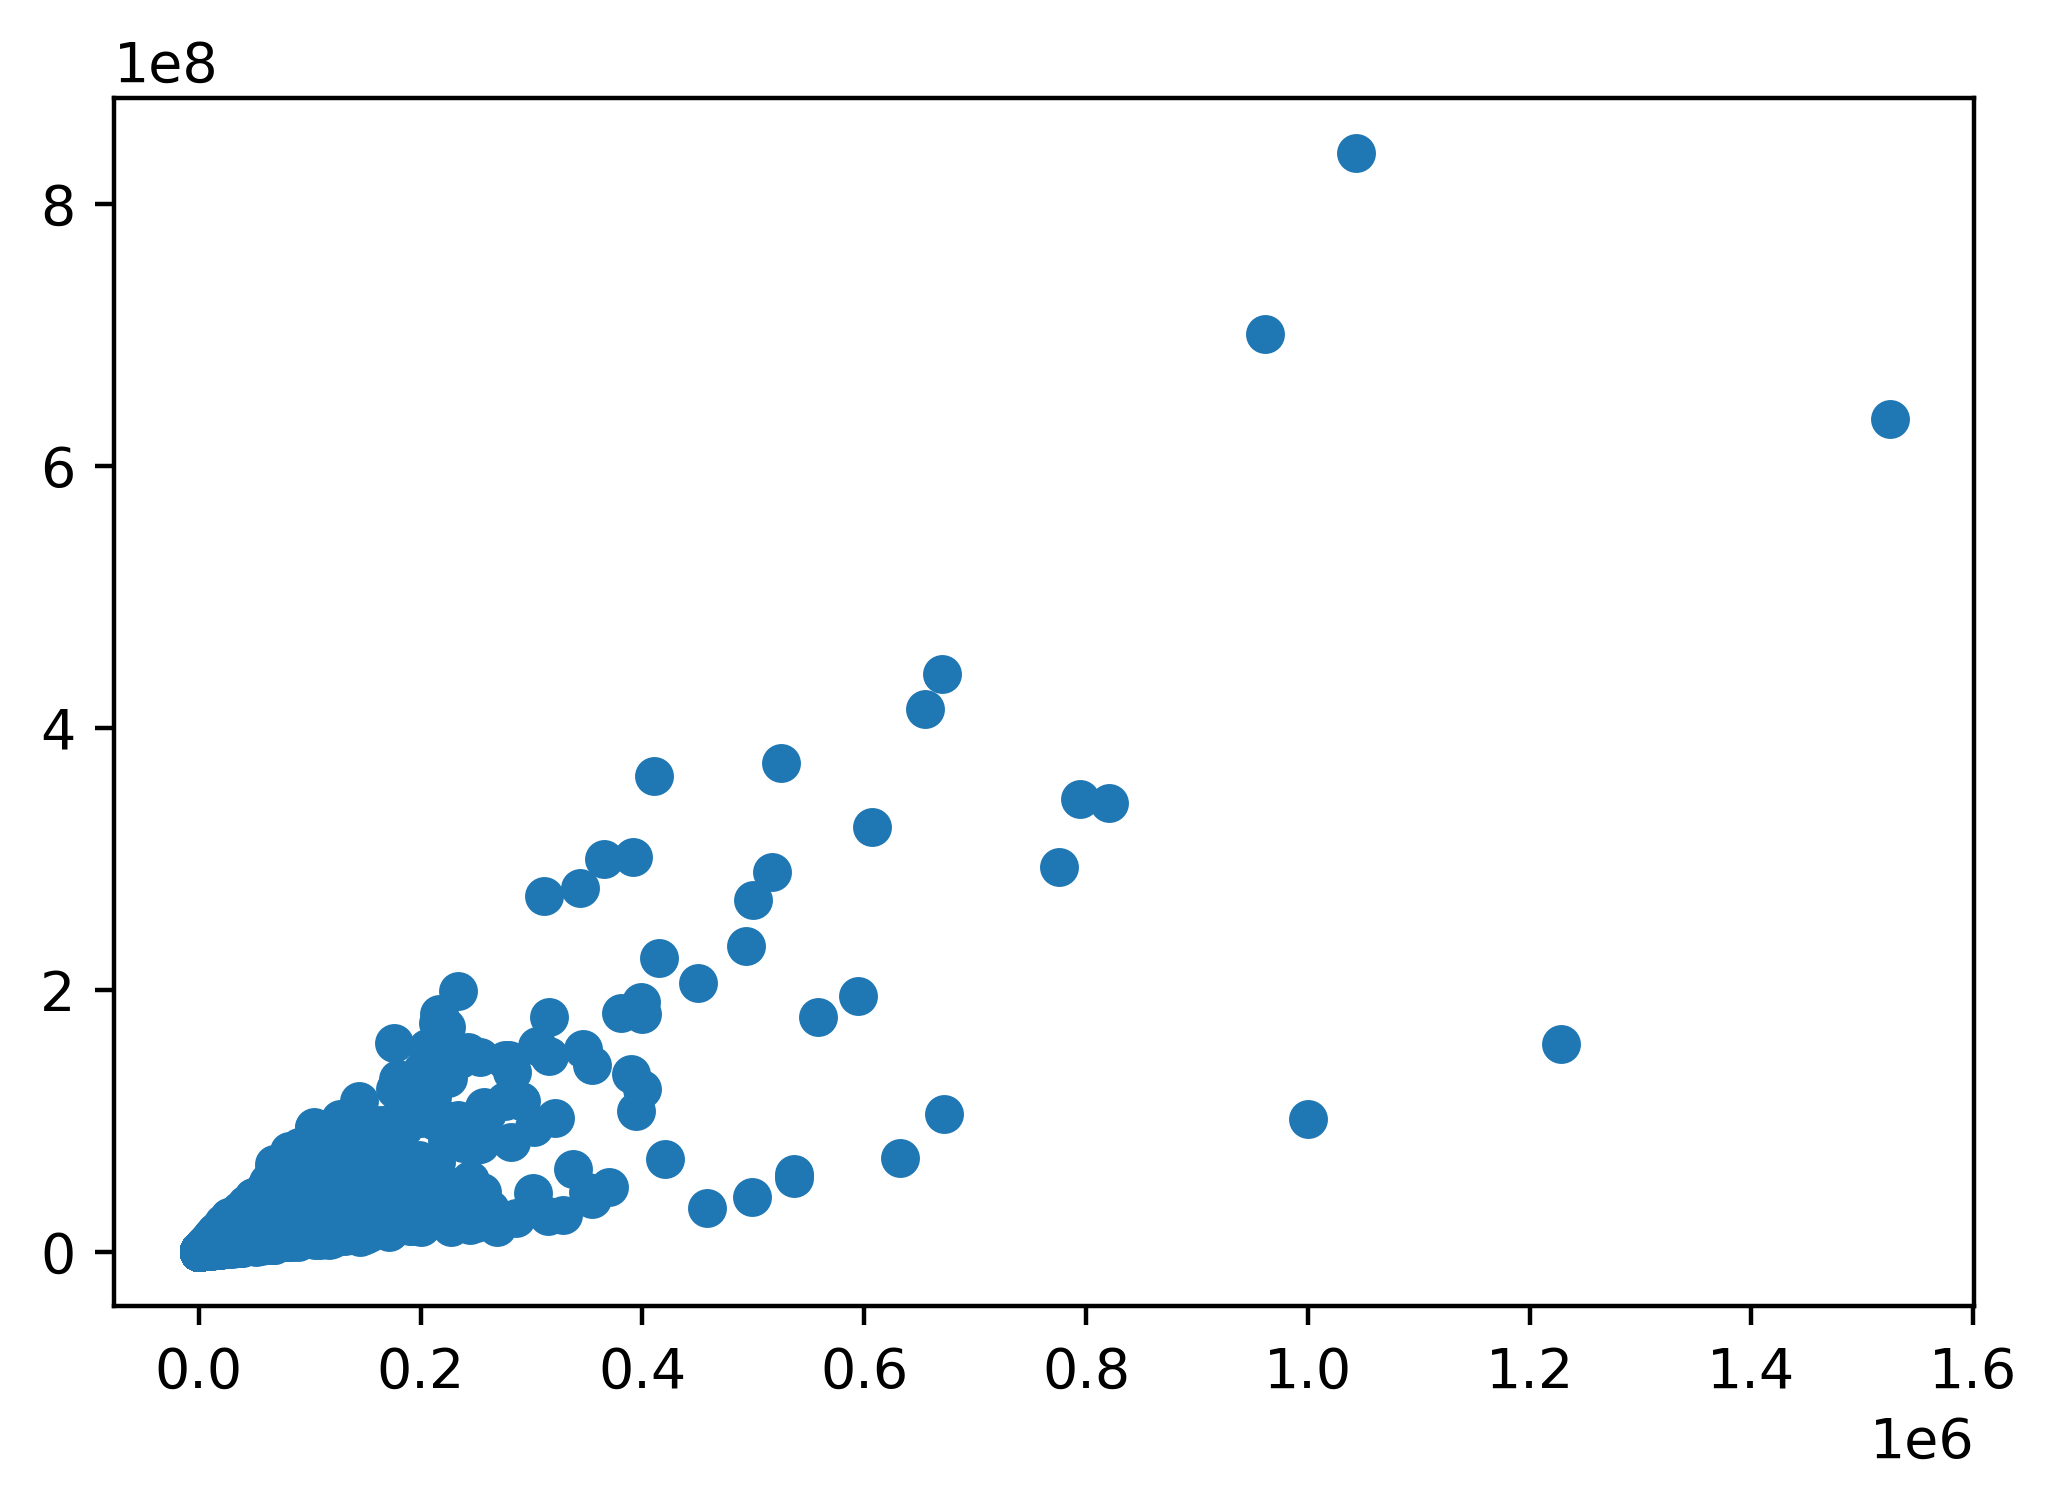

In [36]:
clean_df = df.query(q_0)
x = clean_df['sq_feet']
y = clean_df['truth_budget']
plt.scatter(x, y)

In [39]:
import numpy as np
np.average(clean_df['sq_feet'])

20611.068927838896

In [298]:
x = x.values.reshape(-1,1)


In [299]:
from sklearn.linear_model import LinearRegression
regr = LinearRegression()
# Train the model
regr.fit(x, y)

pred_y = regr.predict(x)

Coefficients: 
 [393.23661915]
Mean squared error: 245330657534180.38
Coefficient of determination: 0.73


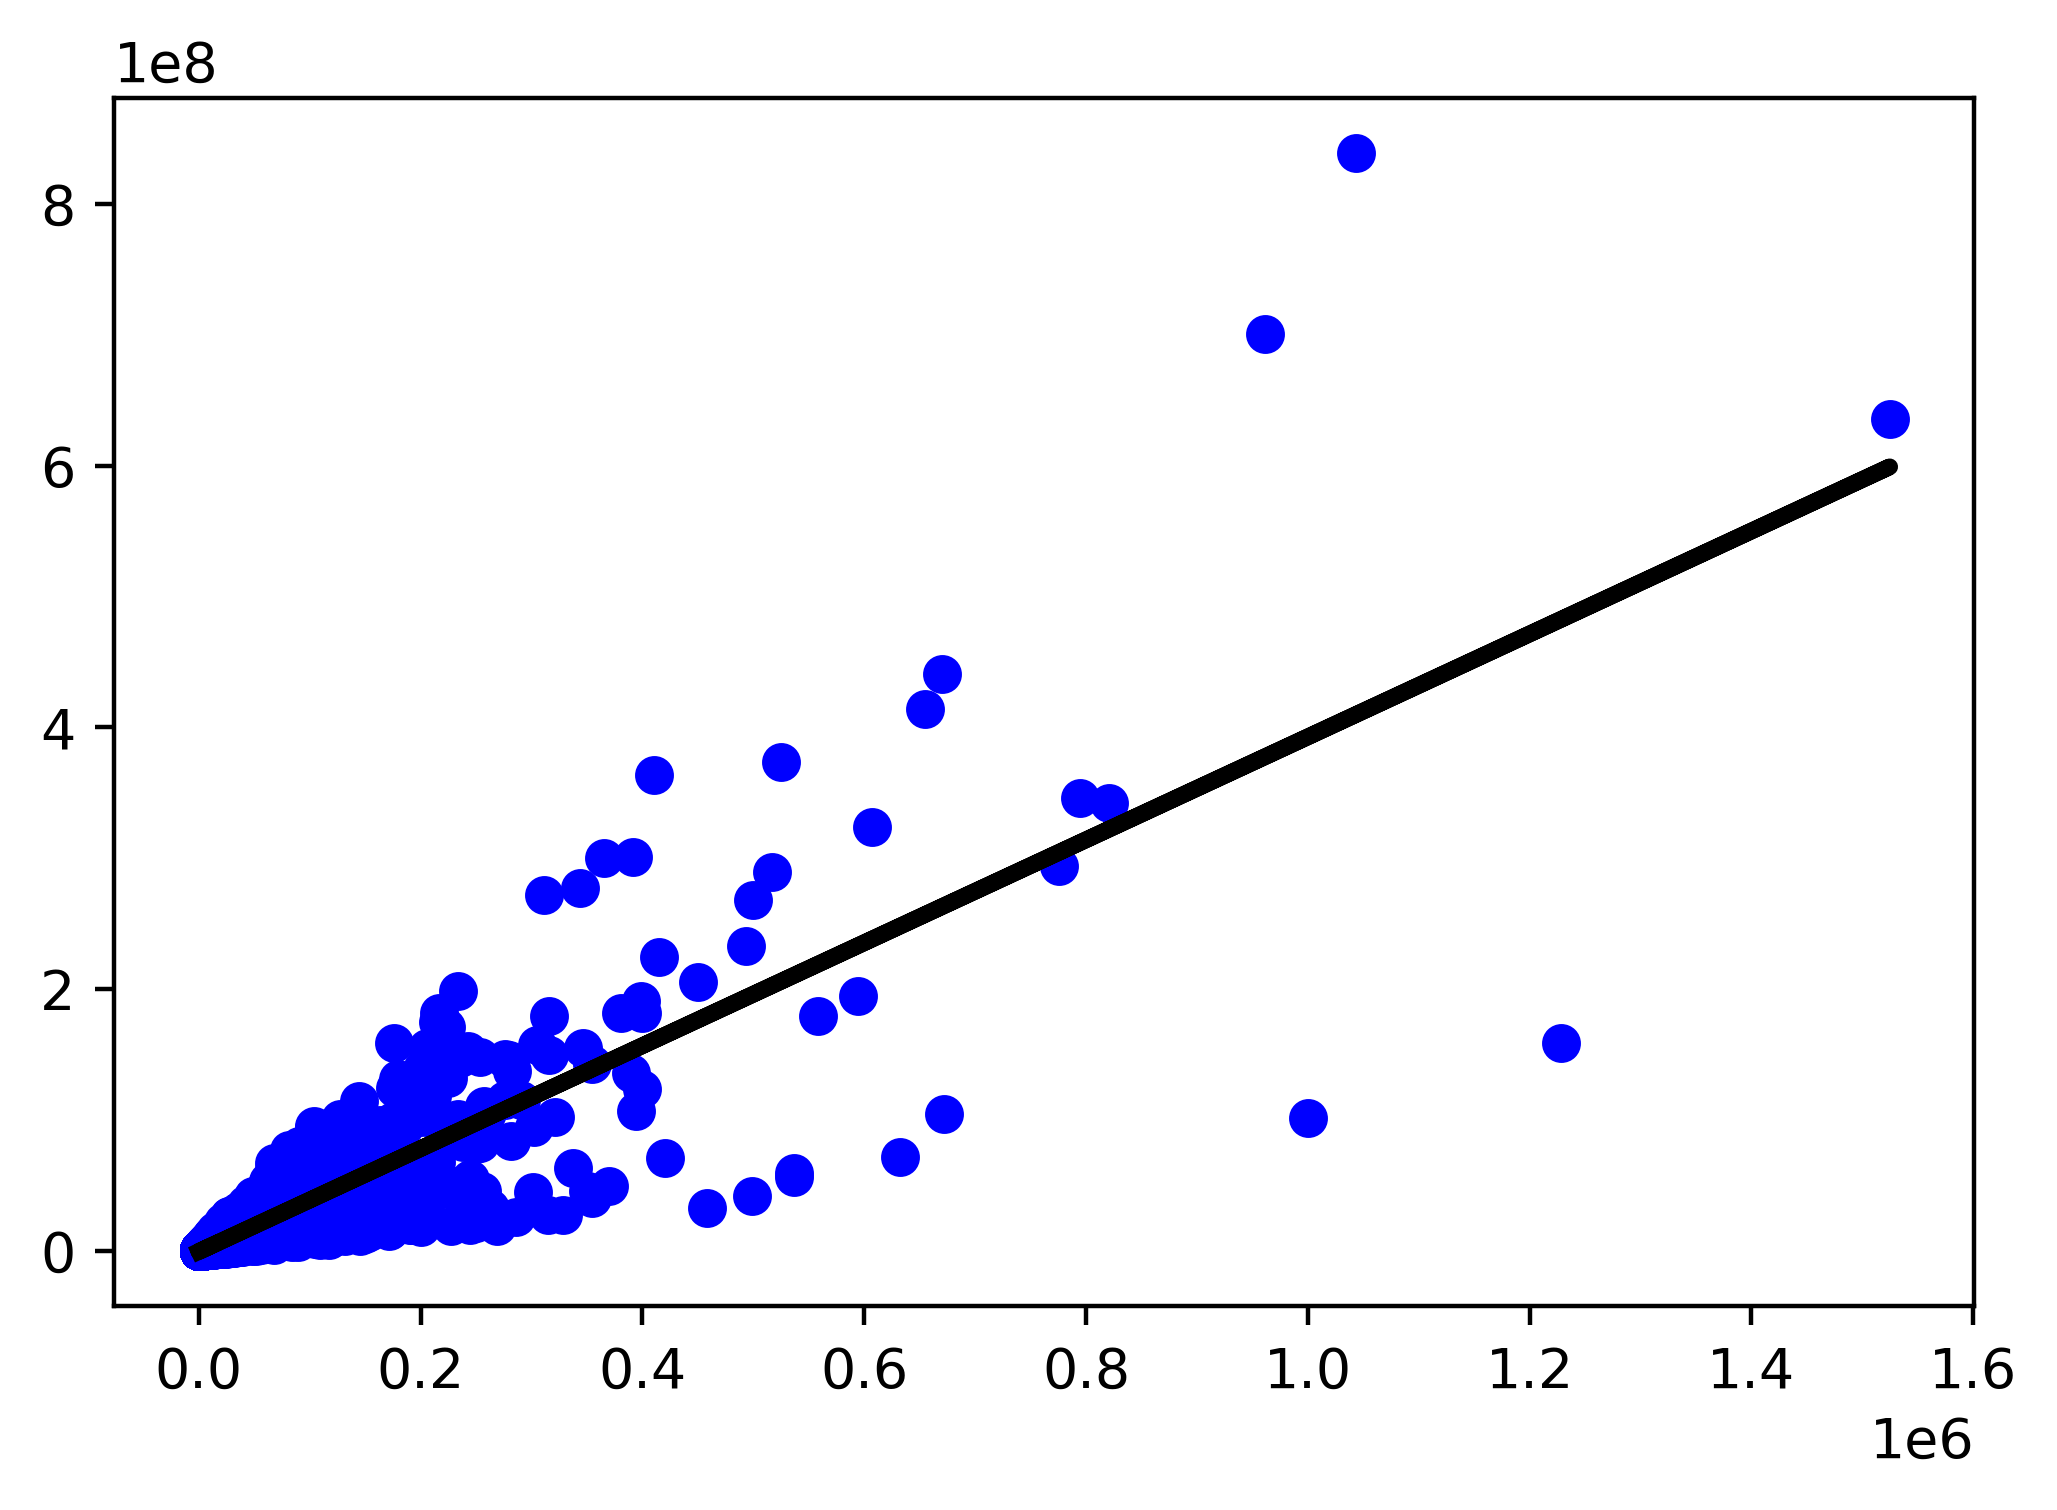

In [301]:
from sklearn.metrics import mean_squared_error, r2_score

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2f'
      % mean_squared_error(y, pred_y))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.2f'
      % r2_score(y, pred_y))

# Plot outputs
plt.scatter(x, y,  color='blue')
plt.plot(x, pred_y, color='black', linewidth=3)

# plt.xticks(())
# plt.yticks(())

plt.show()

In [141]:
df['AccountID'].nunique()

379

In [148]:
folder = "/Users/rvanderwall/projects/AI_Team/construction-AI/SQLInterface/Prototypes/Contingency"
file = 'Assets/US1 Filled Out Accounts.csv'

INDUSTRY_FEATURE_FILE = folder + "/" + file
with open(INDUSTRY_FEATURE_FILE, 'rb') as f:
    features = pd.read_csv(f)
    account_verticals = features[['AccountID', 'Industry / Vertical']]
    merged_features = df.merge(account_verticals, on='AccountID', how='left')
    merged_features['Vertical'] = merged_features['Industry / Vertical'].fillna("UNK")

df2 = merged_features

In [149]:
df2['Vertical'].value_counts()

Healthcare          26665
Higher Education    23016
Commercial          18067
UNK                 17171
Government           6327
Education K-12       3129
Utilities             868
Multi-Industry         70
Name: Vertical, dtype: int64

In [239]:
df3 = df2
df3 = df3.query("State == 'TX'")
df3 = df3[df3['Description'].astype(str).str.contains("renov", case=False)]
# df3 = df3.query("Vertical == 'Healthcare'")
df3['Description']

282                                      Pre-K, Renovation
335      Create three new psych treatment rooms within ...
1322                           Kitchen & Dining Renovation
2041     Renovation of radiology department to accommod...
2812                    Foodservice, Athletics, Renovation
                               ...                        
94459                            ED EXPANSION & RENOVATION
95024    Demo lab casework, fume hood, and flooring.  R...
95064    This project consists of the renovation of exi...
95228                   Foodservice, Athletics, Renovation
95302    Renovation of 2301 Horizon Drive for use by Tr...
Name: Description, Length: 344, dtype: object

In [267]:
max_sqft = 100_000
max_budget = 10_000_000
q = f'sq_feet > 0 & sq_feet < {max_sqft} & truth_budget > 0 & truth_budget < {max_budget}'
clean_df = df3.query(q)

x = clean_df['sq_feet']
y = clean_df['truth_budget']

x = x.values.reshape(-1,1)

Coefficients: 
[-11.70704478]
Mean squared error: 7863586878513.23
Coefficient of determination: 0.01


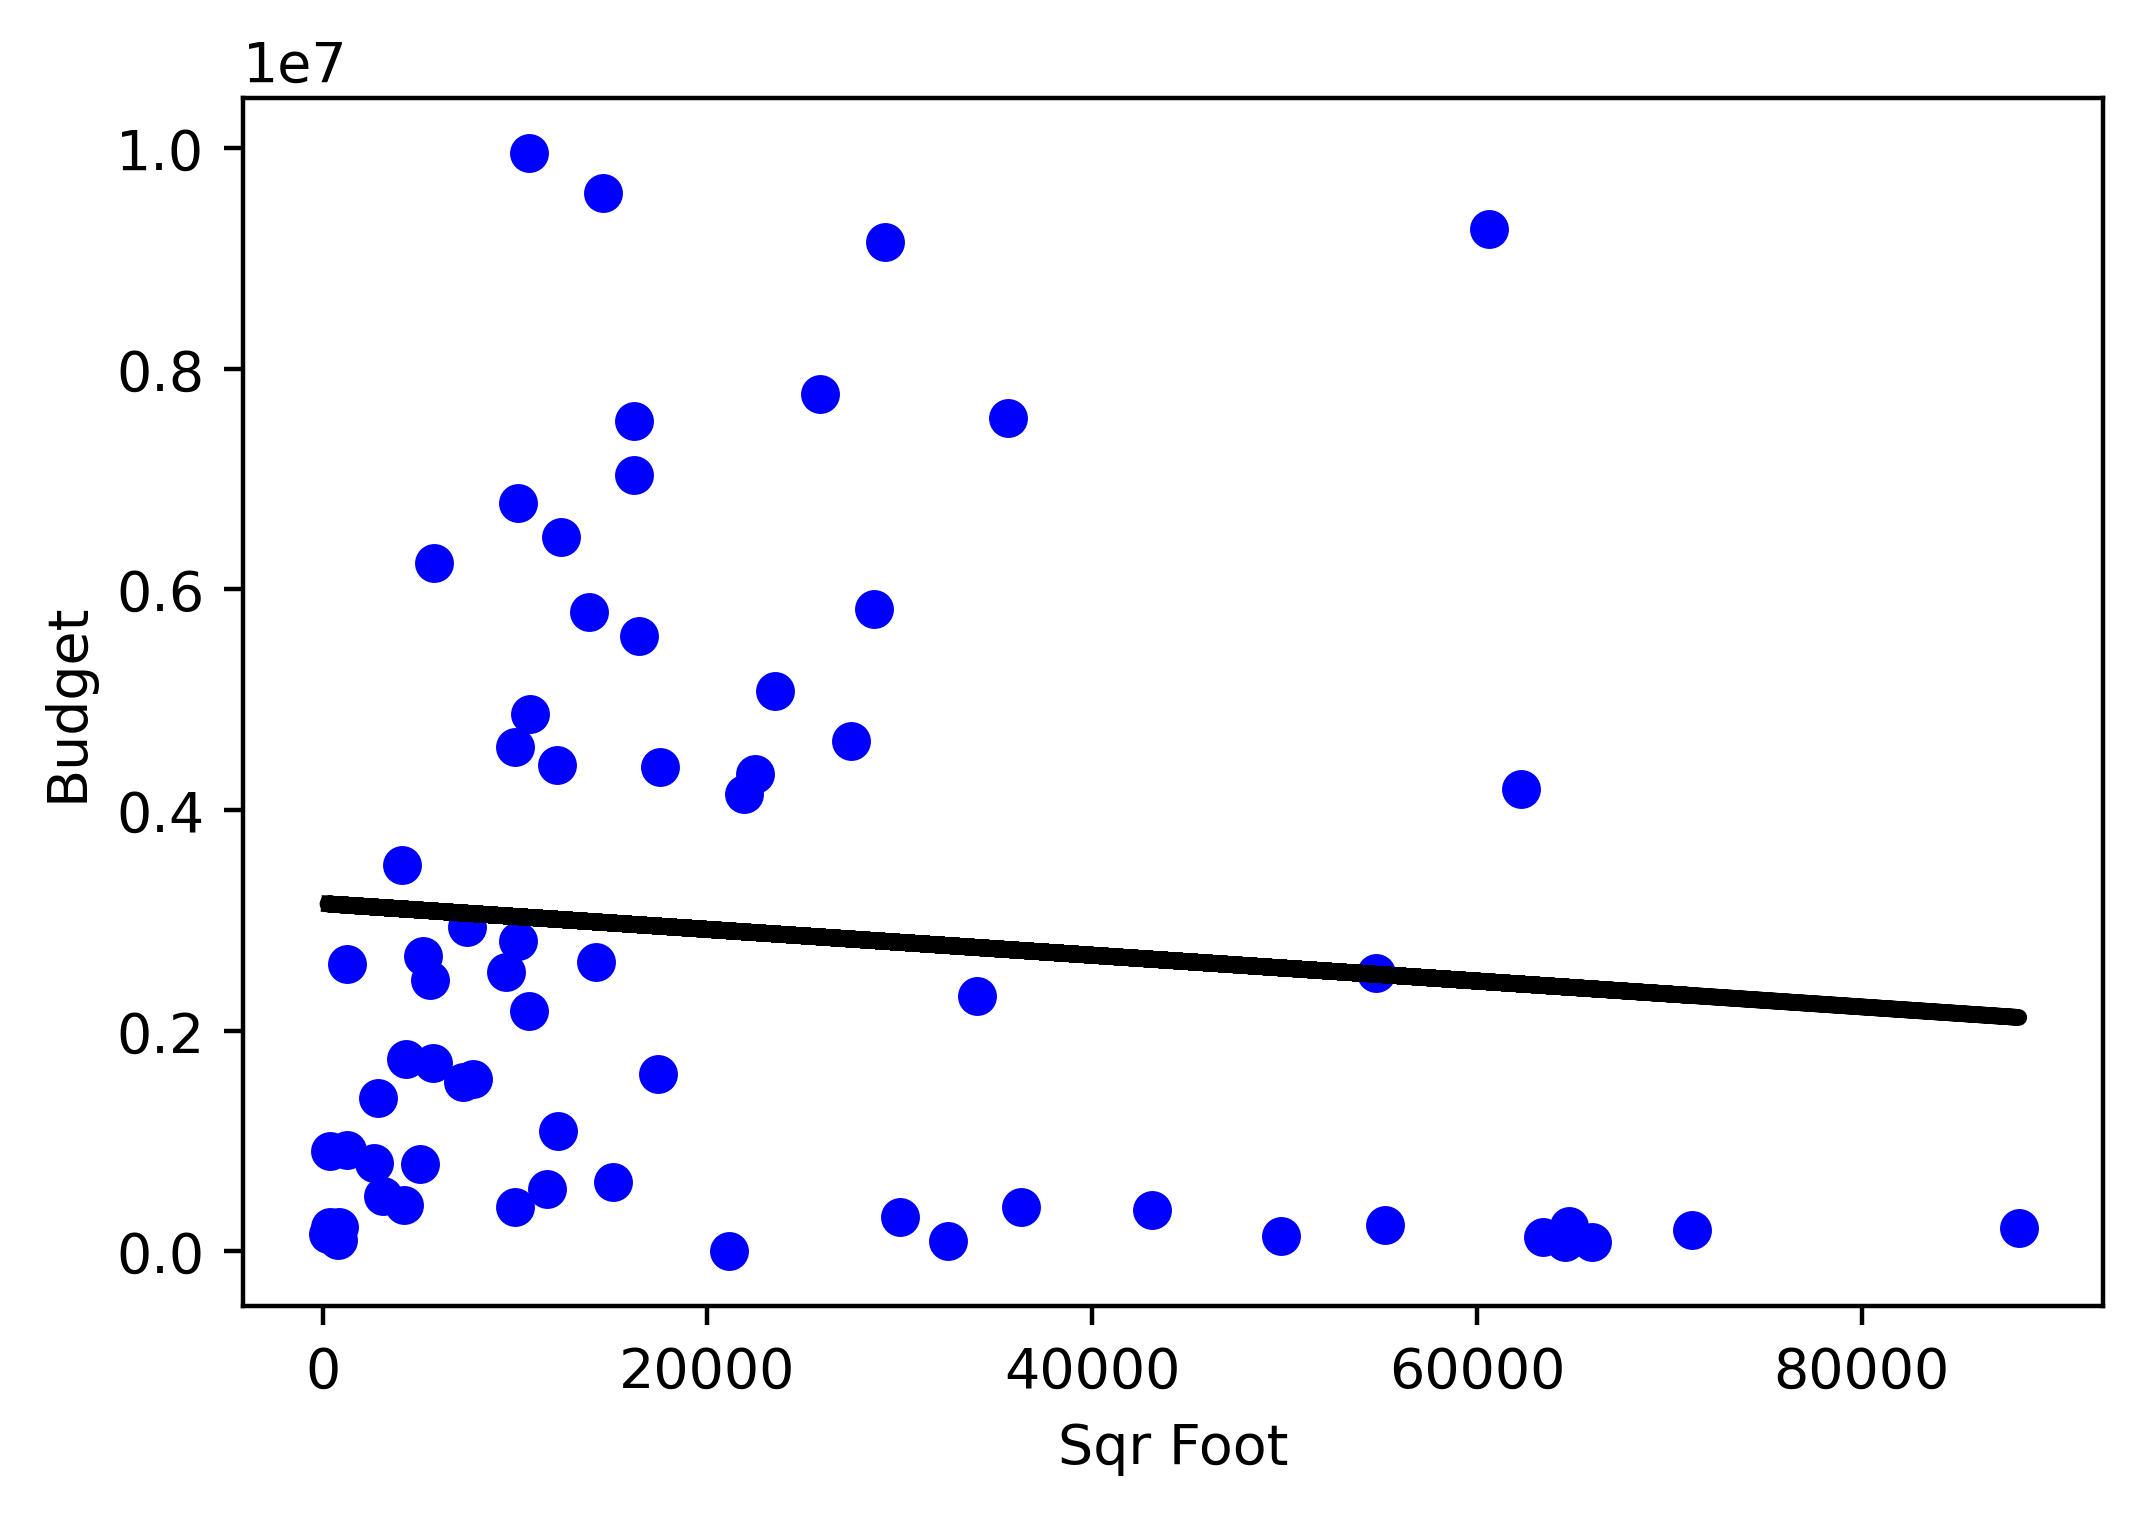

In [268]:
from sklearn.metrics import mean_squared_error, r2_score
# plt.scatter(x, y)

regr = LinearRegression()
regr.fit(x, y)

pred_y = regr.predict(x)

print(f'Coefficients: \n{regr.coef_}')
print(f'Mean squared error: {mean_squared_error(y, pred_y):.2f}')
print(f'Coefficient of determination: {r2_score(y, pred_y):.2f}')

# Plot outputs
plt.scatter(x, y,  color='blue')
plt.plot(x, pred_y, color='black', linewidth=3)

plt.xlabel('Sqr Foot')
plt.ylabel('Budget')
# plt.xticks(())
# plt.yticks(())

plt.show()

In [34]:
df['StartDate']

0        2016-11-09 00:00:00.000
1        2019-06-06 00:00:00.000
2        2014-05-29 00:00:00.000
3        2014-07-01 00:00:00.000
4        2015-08-18 15:25:08.000
                  ...           
95181    2016-08-19 00:00:00.000
95182    2018-05-09 00:00:00.000
95183    2017-05-17 22:04:48.000
95184    2019-04-11 00:00:00.000
95185    2016-02-10 08:00:00.000
Name: StartDate, Length: 95186, dtype: object